<table class="tfo-notebook-buttons" align="left">
<td>
    <a target="_blank" href="https://colab.research.google.com/github/Harvard-am216/2019-spring/blob/master/Labs/week2_lecture_lab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td>
</table>

# 1. Regularization

In [91]:
from sklearn import linear_model
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


import scipy.optimize as spopt
import sklearn

### Generate Data to fit

#### To keep it simple, we will generate data that comes from the function sin(x), for $-\pi \le x\le pi$.

We add noise (eps) to the signal, to emulate partial corruption. How the results below change as a function of the noise strength is of interest.

One important concept that will pervade our efforts to do machine learning is to split the data into test data and training data. We will fit the model on the training data, but then we evaluate how well it works on the test data.
We will see in what follows that even in simple linear problems like the one we are carrying out here, *overfitting is possible*. This means that the fitting function models the peculiarities of the (noisy) sample we have drawn and it doesnt generalize to more complex datasets.

Building generalizable models is the crux of the matter

In [209]:
n=30  # number of points
x_train= np.random.random(size=(n,1))*np.pi*2-np.pi
x_test=np.linspace(-np.pi,np.pi,100).reshape(100,1) # test data w/o noise

In [210]:
eps=0.1  # noise strength
y=np.sin(x_train)+ eps*np.random.randn(n,1) # training data with noise


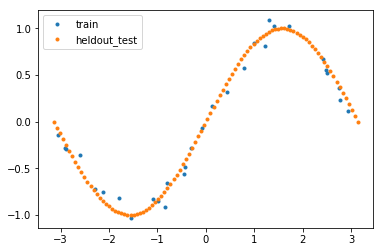

In [211]:
plt.plot(x_train,y,'.', label = 'train')
plt.plot(x_test,np.sin(x_test),'.', label = 'heldout_test')
plt.legend()

### Now we move onto make Polynomial fits...

In [212]:
def poly_basis(X, d):
    """Returns a polynomial of degree d-1.  
    
    Args:
        X: data array, that is n x 1
        d: degree of the polynomial
    Returns:
        coefficient matrix of the polynomials n x d """
    return np.power(X, np.arange(0, d))

In [213]:
# Generate A matrix -- this is n x d, consisting of powers up to x^(d-1)
d = 20
X = poly_basis(x_train, d) # X.shape is (30,20)

In [214]:
# Us sklearn to do linear regression
linReg = linear_model.LinearRegression()
answer = linReg.fit(X, y)

In [215]:
# prediction of training answer
y_fit=answer.predict(poly_basis(x_train,d))

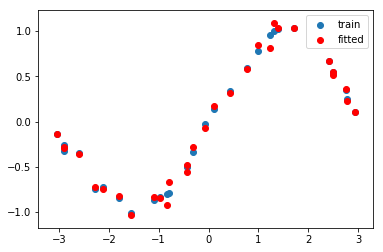

In [216]:
plt.scatter(x_train,y_fit, label = 'train')
plt.scatter(x_train,y, color = 'red', label = 'fitted')
plt.legend()

### This seems good, but is it *too* good?

Lets try to make predictions for a **different** set of points, say, for the held-out test set

In [217]:
y_test=answer.predict(poly_basis(x_test,d))

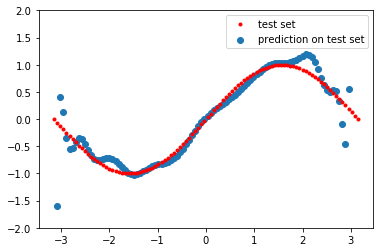

In [218]:
plt.scatter(x_test,y_test, label = 'prediction on test set')
plt.plot(x_test,np.sin(x_test),'.',color='red', label = 'test set')
plt.ylim((-2,2))
plt.legend()

It fails to match. The fitting uses too significant high order terms to match the training set with noise. Check the coefficients

In [219]:
answer.coef_

array([[ 0.00000000e+00,  9.23602478e-01, -9.01219528e-01,
         3.93779052e-01,  1.81239322e+00, -1.57320042e+00,
        -1.40692541e+00,  1.90111573e+00,  5.02900598e-01,
        -1.16665241e+00, -7.11142114e-02,  4.03366485e-01,
        -3.49912113e-03, -8.17810282e-02,  2.27151577e-03,
         9.63239756e-03, -2.49429029e-04, -6.09692373e-04,
         9.08870795e-06,  1.60273661e-05]])

## Regularization -- Ridge regression

We are now optimizing $$|X \beta - y|^2 + \alpha |\beta|^2$$

In [220]:
ridge = linear_model.Ridge(alpha=1, fit_intercept=False)
ridge.fit(X, y)

/anaconda3/envs/pymatgen3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.200060e-19
  overwrite_a=True).T


Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [221]:
ridge.coef_

array([[-6.68139932e-02,  5.60362758e-01, -2.95106080e-02,
         2.18519394e-01,  1.54621659e-02,  6.21384379e-02,
         1.31088544e-02, -4.22390675e-02, -1.49363193e-03,
        -6.17191460e-02, -6.77342414e-04,  4.36902606e-02,
        -1.90217158e-04, -1.15818125e-02,  1.13949590e-04,
         1.53669131e-03, -1.50631807e-05, -1.02258152e-04,
         6.29564266e-07,  2.72410802e-06]])

In [222]:
regularized_answer=ridge.predict(poly_basis(x_train,d))

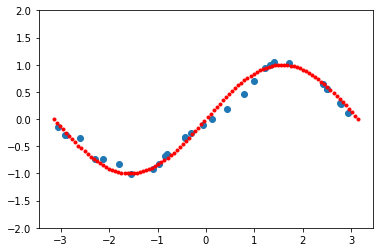

In [223]:
plt.scatter(x_train,regularized_answer)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

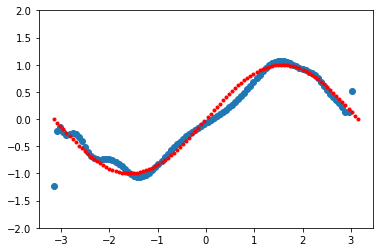

In [224]:
y_reg_test=ridge.predict(poly_basis(x_test,d))
plt.scatter(x_test,y_reg_test)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

### what goes wrong?

Use SVD to examine the size of the singular values. See class discussion.

In [225]:
U,S,V=np.linalg.svd(X)

In [226]:
S

array([2.04833697e+09, 5.18675022e+08, 1.10229309e+07, 3.27117409e+06,
       1.27351370e+05, 4.64971384e+04, 2.62023079e+03, 4.21384066e+02,
       9.41102316e+01, 4.14519559e+01, 8.45122018e+00, 5.83985740e+00,
       3.07308984e+00, 2.00569541e+00, 8.42427596e-01, 5.73414766e-01,
       1.61355787e-01, 1.51666524e-01, 2.67065897e-02, 1.87383449e-02])

The minimum singular value has a size of O(1e-3). This amplifies errors enormously

### Lasso
Another regularization procedure that uses L1 penalty instead

In [227]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X, y)

/anaconda3/envs/pymatgen3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [228]:
lasso_answer=lasso.predict(poly_basis(x_train,d))
y_lasso_test=lasso.predict(poly_basis(x_test,d))

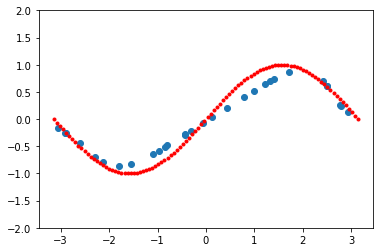

In [229]:
plt.scatter(x_train,lasso_answer)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

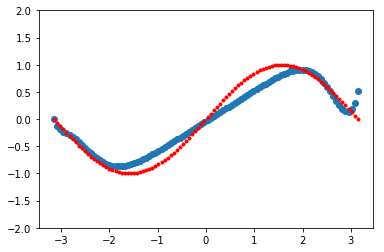

In [230]:
plt.scatter(x_test,y_lasso_test)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

It is a little bit smoother than the ridge regression

### Random Matrix Theory

What is odd about all of this regularization stuff is that we are imposing arbitrary cost functions on what was our particularly good problem. This is imposing constraints that are different than what we had thought about initially.

Here is another approach: 
we showed in class that the solution to the overdetermined least squares problem is:

$(A^TA)^{-1} * A^T y.$

We have also discussed how small singular values of $A$ get us in trouble.

Maybe we could therefore solve the problem by simply **getting rid of the small singular values** when carrying out this inversion?  It seems possible that by simply truncating the smallest eigenvalues, we could achieve the same goal without doing something arbitrary.

In [231]:
# Generate an A matrix which is massively underdetermined, to see how this will go.
d = 10
A = poly_basis(x_train, d)

In [234]:
def approx_inverse(B,N,rhs):
    """approximately invert matrix cutting off the lower eigenvalues.
    This computes the pseudo-inverse of the matrix B.T*B, and keeps the first N highest eigenvalues.
    
    Inputs:
        B: Matrix that we want to invert.
        N: How many of the top modes we want to keep.
        rhs: right hand side we want to return inv(B)*rhs
        
    Returns:
        inv(B)*rhs"""
    
    eigval,eigvec = np.linalg.eig(np.dot(B.T,B))
    
    mat=np.zeros(np.dot(B.T,B).shape)
    for i in range(N):
        mat = mat + np.outer(eigvec[:,i],eigvec[:,i])/eigval[i]
        
    return np.dot(mat,rhs)

In [235]:
# we compute the coefficients of the expansion by keeping a number of coefficients
coeff=approx_inverse(A,10,np.dot(A.T,y))

In [236]:
dummy=poly_basis(x_test,d) # this generates the matrix of powers of x for each of the x_test points

In [237]:
yguess=np.dot(dummy,coeff)  # generate the set of guesses from this procedure.

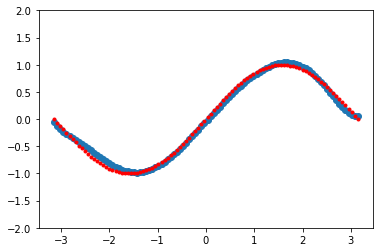

In [238]:
plt.scatter(x_test,yguess)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()


## Random Matrix Theory


In [239]:
M=np.random.randn(100,50)

In [240]:
m_cov=np.cov(M.T)

In [241]:
m_cov.shape

(50, 50)

In [242]:
eig,evec=np.linalg.eig(m_cov)

In [243]:
p=50
n=100.
gamma=p/n
upper=np.power((1+np.sqrt(gamma)),2)
lower=np.power((1-np.sqrt(gamma)),2)

xx=np.linspace(lower,upper,100)
MP=lambda x: np.sqrt(upper-x)*np.sqrt(x-lower)/(2*np.pi*x*gamma)

/anaconda3/envs/pymatgen3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


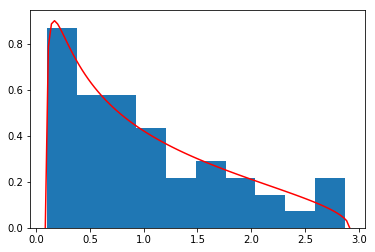

In [244]:

plt.hist(eig,normed=True)
plt.plot(xx,MP(xx),c='r')
plt.show()

# 2. Logistic regression

## 2.1 Logistic regression for MNIST

We are going to use the MNIST dataset because it is for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. One of the things we will notice is that parameter tuning can greatly speed up and improve a machine learning algorithm. 

### Downloading the Data (MNIST)

In [34]:
%matplotlib inline
import torchvision.datasets as datasets
data = datasets.MNIST(root='.', download=True)
train_data = data.train_data.reshape(-1,784)
train_labels = data.train_labels.reshape(-1,1)
train_data = train_data.numpy()
train_labels = train_labels.numpy()
train_labels = train_labels.reshape(60000,) # shape required by sklearn model

Now that you have the dataset loaded you can use the commands below

In [35]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , train_data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", train_labels.shape)

Image Data Shape (60000, 784)
Label Data Shape (60000,)


### Splitting Data into Training and Test Sets (MNIST)

In [36]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    train_data, train_labels, test_size=1/6.0, random_state=0)

### Showing the Images and Labels (MNIST)

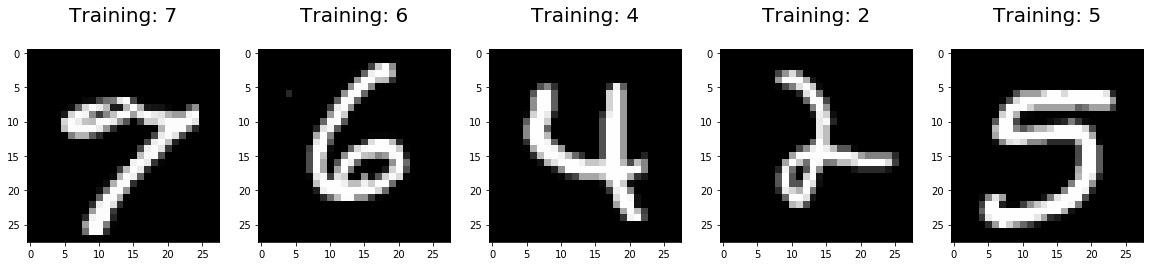

In [41]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [42]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model

In [43]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

**Step 3.** Training the model on the data, storing the information learned from the data

Model is learning the relationship between digits and labels

In [44]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

**Step 4.** Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [56]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([3])

In [46]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array([3, 6, 6, 6, 0, 3, 6, 2, 5, 6])

In [47]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_img)

### Measuring Model Performance (MNIST)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as: 

(fraction of correct predictions): correct predictions / total number of data points

In [48]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9151


### Plotting the coefficients. Can you see the shadow of digits 0 to 9?

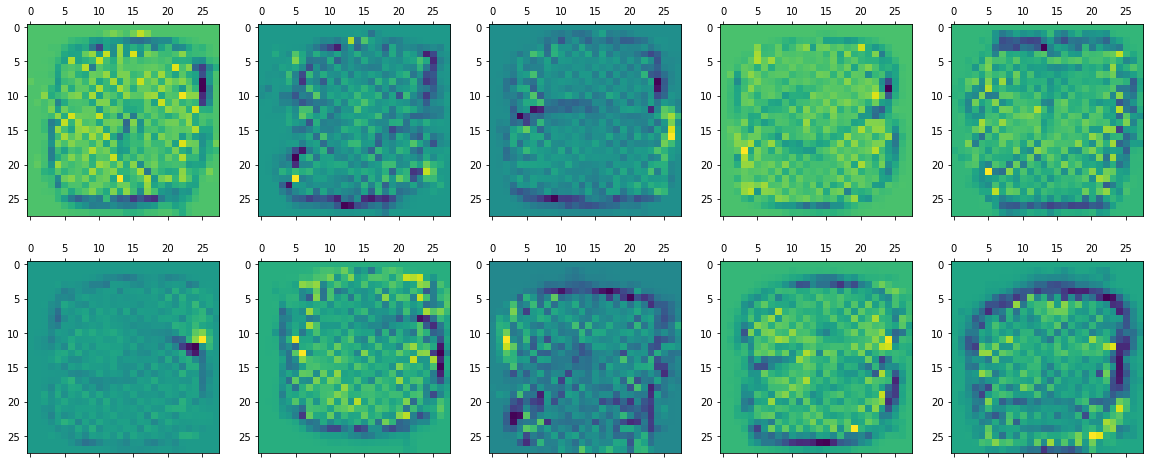

In [74]:
fig, ax = plt.subplots(2,5,figsize = (20,8))
for i in range(10):
    ax[i//5, i%5].matshow(logisticRegr.coef_[i].reshape(28,28))

### Display Misclassified images with Predicted Labels (MNIST)

In [49]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

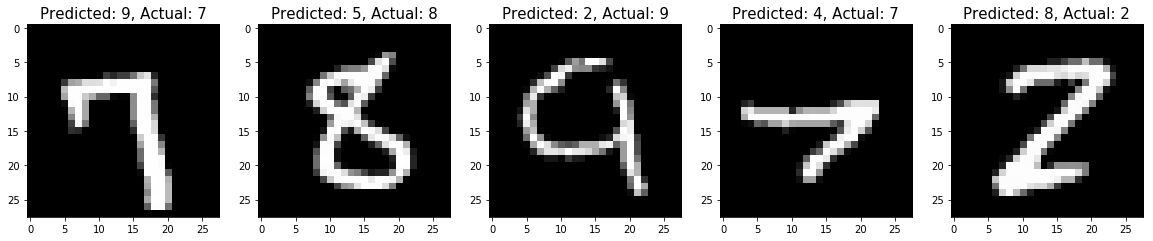

In [50]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## 2.2 Logistic regression for classifying two different temperatures of a 2D ferromagnetic spin model on square lattice

### Generate the data yourself (skip to the next block for lab)

For size larger than 32 it may take significant time to generate dataset. To proceed, skip to the next block

In [ ]:
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''  
    def __init__(self, size, temp):
        self.temp = temp
        self.N = int(size)
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N) # select a row
                    b = np.random.randint(0, N) # select a column
                    s =  config[a, b] # current state at (a, b)
                    # periodic boundary condition imposed
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        config = 2*np.random.randint(2, size=(self.N,self.N))-1   
        times = 100
        for i in range(times):
            self.mcmove(config, self.N, 1.0/self.temp)
        return config

To generate data

In [ ]:
ising_simu = Ising(32, 0.8)
result = ising_simu.simulate()

### Load data

Download the data from this github directory

In [246]:
high_t = []
for i in range(500):
    high_t.append(np.loadtxt('./ising_high_32/'+str(i).zfill(3), delimiter=',')) ## Change to your local directory!

In [247]:
low_t = []
for i in range(500):
    low_t.append(np.loadtxt('./ising_low_32/'+str(i).zfill(3), delimiter=',')) ## Change to your local directory!

Plot it and see what the spin states on the lattice look like, under these two temperatures. In case you are interested, the high temperature is $T^*=10$ and the low temperature is $T^* = 0.4$. In case you are still interested what is the physical meaning of $T^*$, according to Onsager's beautiful work, the critical temperature is
$$T^*_c = k_B T_c/J = \frac{2}{\ln(1+\sqrt{2})} \approx 2.26918531421$$
where $k_B$ is the Boltzmann's constant and $J$ is the coupling strength between nearest-neighbor of spins, when the spin state is nondimensionalized as $\{+1,-1\}$, corresponding to spin-up and spin-down.

- $T<T_c$ is the ferromagnetic phase. See below

In [248]:
import matplotlib.pyplot as plt

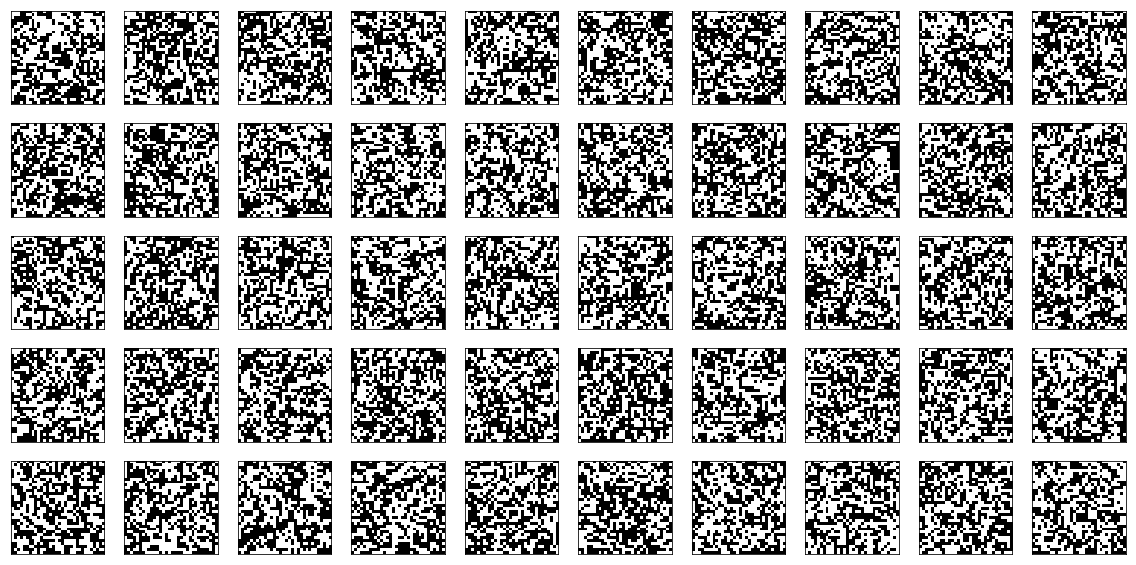

In [249]:
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

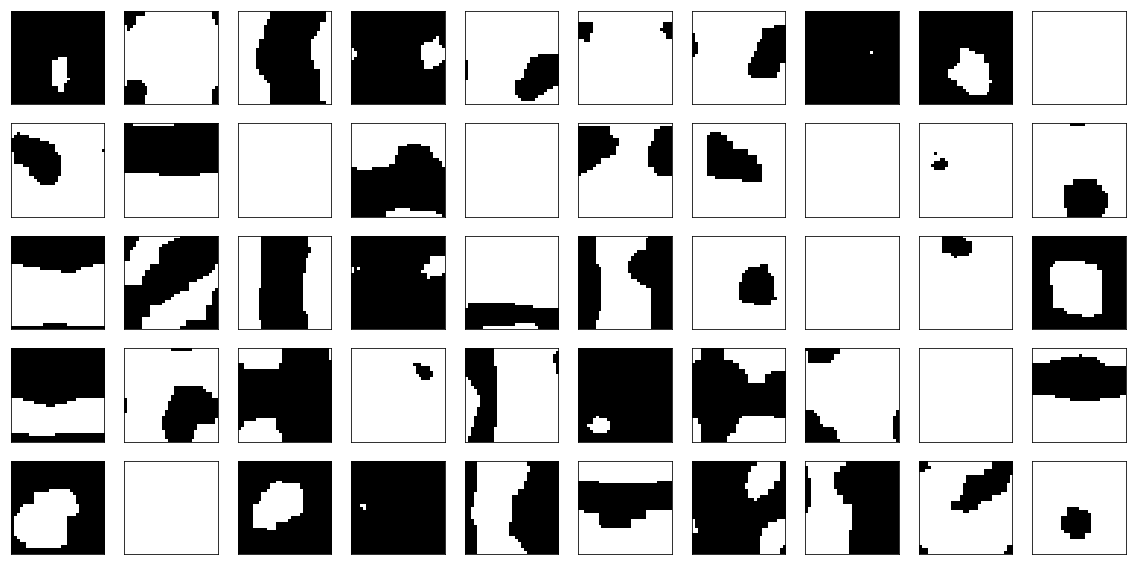

In [250]:
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

Note that periodic boundary condition is imposed. For low temperature you can see cases that are almost totally white or totally black. This is a key feature of the ferromagnetic phase.

### Logistic regression - Not separable

In [251]:
data_img = np.concatenate((high_t,low_t))
data_img = data_img.reshape((-1, 32*32))
data_label = np.concatenate((np.ones(len(high_t)), np.zeros(len(low_t))))

In [254]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    data_img, data_label, test_size=1/5.0, random_state=0)

In [255]:
print(train_img.shape)

(800, 1024)


In [256]:
print(train_lbl.shape)

(800,)


In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [259]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [260]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.635


It almost doesn't work at all! Note that a random guess has score 0.5.

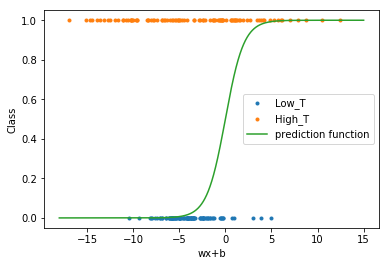

In [261]:
weight = logisticRegr.coef_
b = logisticRegr.intercept_
projection = np.dot(weight, test_img.transpose())+b
projection = projection.reshape(200)
result0 = projection[test_lbl==0]
result1 = projection[test_lbl==1]
plt.figure()
plt.plot(result0,test_lbl[test_lbl==0],'.', label = 'Low_T')
plt.plot(result1,test_lbl[test_lbl==1],'.', label = 'High_T')
plt.plot(np.arange(-18,15,0.01),1/(1+np.exp(-1*np.arange(-18,15,0.01))), label = 'prediction function')
plt.xlabel('wx+b')
plt.ylabel('Class')
plt.legend();

It cannot be separated. Below is the weight plotted in 32*32. No observable features are learned.

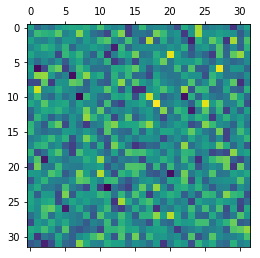

In [262]:
plt.matshow(logisticRegr.coef_.reshape(32,32))

# 3. Support Vector Machines (SVMs)

## 3.1 Basic examples

The internet has more resources about SVMs than you can read in a lifetime.
I recommend [this](https://www.youtube.com/watch?v=eHsErlPJWUU) and [this](https://www.youtube.com/watch?v=XUj5JbQihlU&t=2940s) videos by Yaser Abu-Mostafa (CalTech). [SKlearn's documentaion](http://scikit-learn.org/stable/modules/svm.html) is also very helpful. [This is a nice interactive demo](https://cs.stanford.edu/people/karpathy/svmjs/demo/) from Karpathy, and [this](https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93) is a nice blogpost.

(-10, 10)

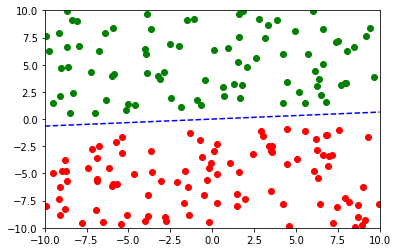

In [88]:
%matplotlib inline
from __future__ import division
import numpy as np
import os,sys,pprint
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#np.random.seed(21)

N=200
ps=np.random.uniform(low=-10,high=10,size=[N,2]) # generate N points
alpha=np.random.uniform(low=0,high=2*np.pi)      # generate a random direction
b=np.array([np.cos(alpha), np.sin(alpha)])       # The normal direction of the boundary 
ps=ps[np.abs(np.matmul(ps,b))>1] # Delete points whose distance to boundary is < than 1. np.matmul is distance

ix_a=np.dot(ps,b)>0              # indices of one label
ix_b=np.dot(ps,b)<0              # indices of other label

X=np.linspace(-10,10)
plt.plot(ps[ix_a,0],ps[ix_a,1],'or')
plt.plot(ps[ix_b,0],ps[ix_b,1],'og')
plt.plot(X,-X*b[0]/b[1],'--b')
plt.gca().set_xlim([-10,10])
plt.gca().set_ylim([-10,10])

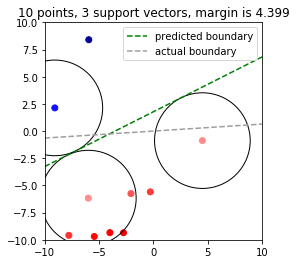

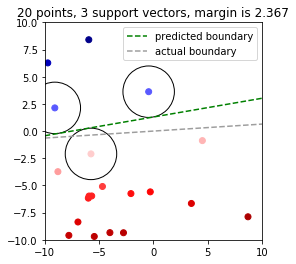

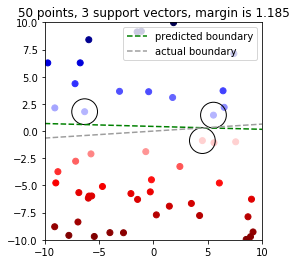

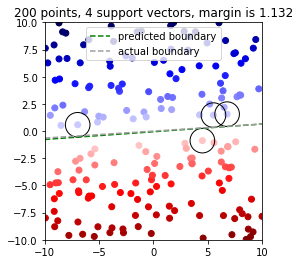

In [79]:
svc=SVC(kernel='linear',C=1e10) #(very high C, effectively infinity, aiming for exact separability)
w=0
def partial_fit(n): #fits the classifier on the first n points
    svc.fit(ps[:n], ix_a[:n])   
    distance=svc.decision_function(ps)
    scaled_distance=(distance-min(distance))/(max(distance)-min(distance))
    
    f,ax=plt.subplots(1,1)
    plt.scatter(ps[:n,0],ps[:n,1],c=cm.seismic(scaled_distance)) #color points according to their predicted distance
    w = svc.coef_[0]
    a = -w[0] / w[1]
    ax.plot(X, -(w[0]*X + svc.intercept_[0])/ w[1],'--g',label='predicted boundary')
    ax.plot(X,-X*b[0]/b[1],'--',color=[0.62,0.62,0.62],label='actual boundary')
    #import pdb; pdb.set_trace()
    margin=1/np.linalg.norm(w)
    for sv in svc.support_vectors_:
        ax.add_artist(plt.Circle(sv, margin, fc='none', ec='k'))
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    ax.set_ylim([-10,10])
    ax.legend()
    ax.set_title('%d points, %d support vectors, margin is %1.3f' % (n,len(svc.support_vectors_), margin))
    ax.set_aspect('equal')


for n in [10,20,50,200]:
    partial_fit(n)


Let's generate some other data that is not linearly separable:

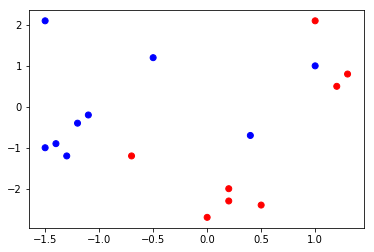

In [80]:
ps=np.array([[ 0.4, -1.5, -1.4, -1.3, -1.1, -1.2, -0.5, -1.5,  1. ,  1.3,  1.2, 0.2,  0.5,  0.2,  0. ,  1., -0.7],
       [-0.7, -1. , -0.9, -1.2, -0.2, -0.4,  1.2,  2.1,  1. ,  0.8,  0.5, -2. , -2.4, -2.3, -2.7,  2.1, -1.2]]).T
label= np.array([0] * 9 + [1] * 8)
plt.figure()
plt.scatter(ps[:,0],ps[:,1],c=cm.bwr(256*label))
plt.show()

Try to classify this data using RBF with a few different $\gamma$ values, polynomial kernels with different $C$ etc. and see the result. Here's a quickstart fo you, plotting the desicion bounrady and all that (adapted from [here](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)):

- Intuitively, the $\gamma$ parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The $\gamma$ parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

- The $C$ parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of $C$, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower $C$ will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. **In other words, $C$ behaves as a regularization parameter in the SVM.**

- In the plot below, check these intuitions

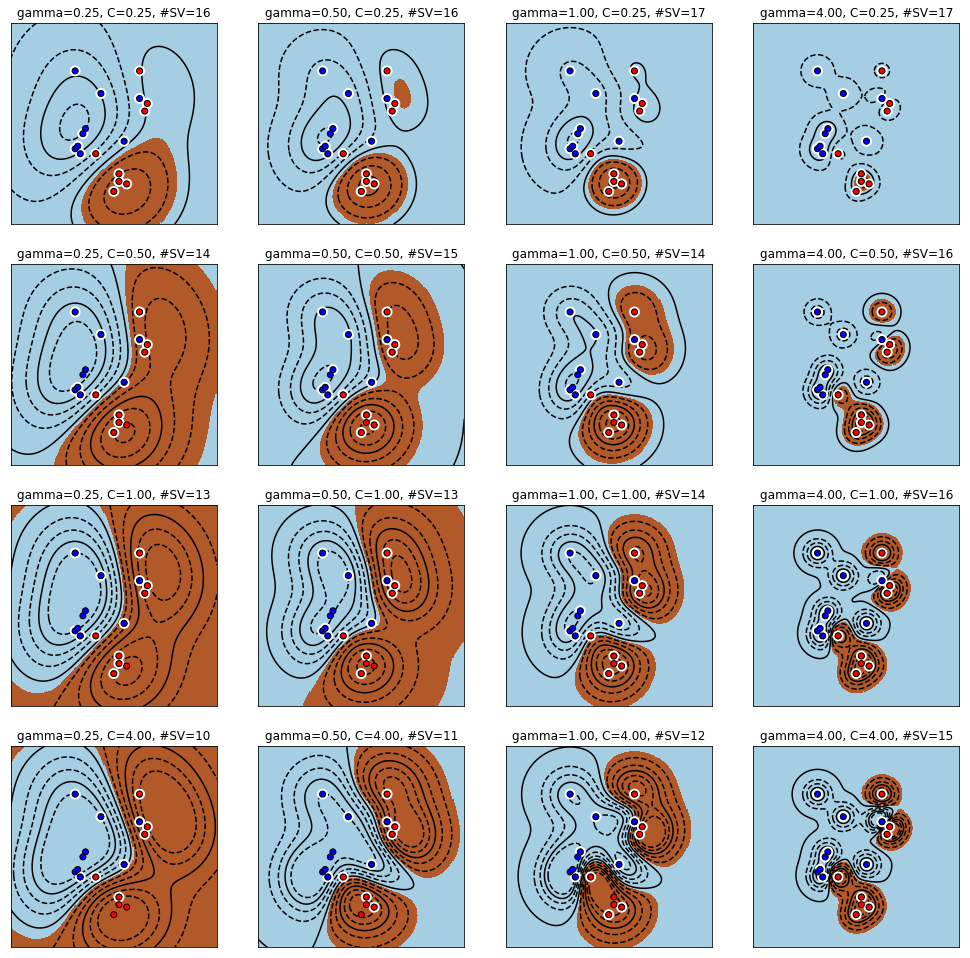

In [81]:
%matplotlib inline
def plot_svm_result(ax,clf):
    # plot the line, the points, and the nearest vectors to the plane
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='w', linewidth=2)
    ax.scatter(ps[:, 0], ps[:, 1], c=cm.bwr(256*label), zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    ax.axis('tight')
    x_min = -4
    x_max = 4
    y_min = -4
    y_max = 4

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) 
    # .ravel(): return a flattened arrray
    # Z: distance to the separating hyperplane

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # region of d>0 to the hyperplane
    ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=np.linspace(-1,1,10))

    ax.set_title('gamma=%1.2f, C=%1.2f, #SV=%s'%(clf.gamma, clf.C, len(clf.support_vectors_)))
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

f,axs=plt.subplots(4,4,figsize=(17,17))
gamma_list=[0.25,0.5,1,4]
C_list=[0.25,0.5,1,4]
svms = np.array([[SVC(kernel='rbf',gamma=g, C=C).fit(ps,label) for g in gamma_list] for C in C_list])

[plot_svm_result(ax,svm) for ax,svm in zip(axs.flat,svms.flat)]
plt.show()

In [83]:
i=1
j=3
print(svms[i][j].C, svms[i][j].gamma)
C_list[i], gamma_list[j]

0.5 4


(0.5, 4)

### The effect of C in linear SVM

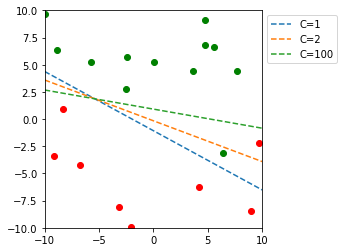

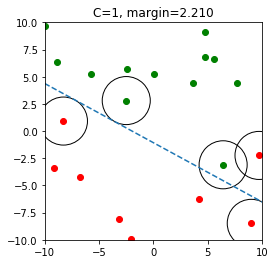

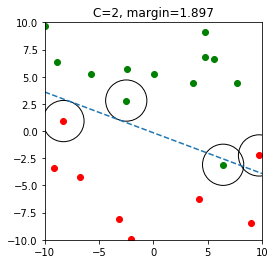

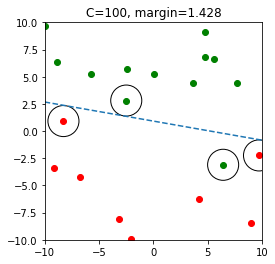

In [84]:
N=20
np.random.seed(112)
ps=np.random.uniform(low=-10,high=10,size=[N,2])
alpha=np.random.uniform(low=0,high=2*np.pi)
b=np.array([np.cos(alpha), np.sin(alpha)])
plt.figure()
X=np.linspace(-10,10)
ix=ps[:,1]>0;#np.sum(ps,axis=1)>0
for i in range(N):
    p=np.exp(-0.1*ps[i,1]**2)
    if np.random.rand()>p:
        ix[i]=np.logical_not(ix[i])
nix=np.logical_not(ix)
plt.plot(ps[ix,0],ps[ix,1],'or')
plt.plot(ps[nix,0],ps[nix,1],'og')

for C in [1,2,100]:
    svc=SVC(kernel='linear',C=C)
    svc.fit(ps, ix)   
    w = svc.coef_[0]
    a = -w[0] / w[1]
    plt.plot(X, a * X - (svc.intercept_[0]) / w[1],'--',label='C=%d'%C)
plt.gca().set_xlim([-10,10])
plt.gca().set_ylim([-10,10])
plt.gca().set_aspect('equal')
plt.gca().legend(bbox_to_anchor=(1,1))

for C in [1,2,100]:
    svc=SVC(kernel='linear',C=C)
    svc.fit(ps, ix)   
    w = svc.coef_[0]
    a = -w[0] / w[1]
    margin=1/np.linalg.norm(w)
    
    f,ax=plt.subplots(1,1)
    ax.plot(ps[ix,0],ps[ix,1],'or')
    ax.plot(ps[nix,0],ps[nix,1],'og')
    ax.plot(X, a * X - (svc.intercept_[0]) / w[1],'--')
    for sv in svc.support_vectors_:
        ax.add_artist(plt.Circle(sv, margin, fc='none', ec='k'))
    ax.set_title('C=%d, margin=%1.3f'% (C,margin))
    ax.set_aspect('equal')
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])

## 3.2 SVM for MNIST

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics

import torchvision.datasets as datasets
data = datasets.MNIST(root='.', download=True)
train_data = data.train_data.reshape(-1,784)
train_labels = data.train_labels.reshape(-1,1)
train_data = train_data.numpy()
train_labels = train_labels.numpy()
train_labels = train_labels.reshape(60000,) # shape required by sklearn model

train_data[train_data>0] = 1

In [25]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    train_data, train_labels, test_size=1/6.0, random_state=0)

In [38]:
classifier = svm.SVC(C=0.1,kernel='rbf',gamma=0.02,cache_size=8000,probability=False)

In [39]:
classifier.fit(train_img[:10000], train_lbl[:10000])

SVC(C=0.1, cache_size=8000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
predicted = classifier.predict(test_img)

In [41]:
np.sum(predicted == test_lbl)/len(test_lbl)

0.9398

## 3.3 SVM for Ising model

(Radial Basis Function) RBF kernal is essential for classifying spin states!

- You will explore more in the homework.

In [145]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    data_img, data_label, test_size=1/5.0, random_state=0)

In [304]:
classifier = svm.SVC(C=1e1,kernel='rbf',gamma=0.003,cache_size=8000,probability=False)

In [305]:
classifier.fit(train_img, train_lbl)

SVC(C=10.0, cache_size=8000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.003, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [306]:
predicted = classifier.predict(test_img)

In [307]:
np.sum(predicted == test_lbl)/len(test_lbl)

0.99